IMPORTING THE NECESSARY LIBRARIES

In [18]:
#Importing libraries and Visualisation Tools
import pandas as pd 
import numpy as np

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [19]:
!pip install keras

In [20]:
!pip install TensorFlow

In [21]:
#Reading the dataset
health = pd.read_csv("my data set.csv")

In [22]:
health.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [24]:
#Summary Of Numerical Values
health.describe().T.style.set_properties(**{'background-color': 'dark blue','color': 'blue','border-color': 'grey'})

,count,mean,std,min,25%,50%,75%,max
BMI,5549.000000,29.150254,6.570653,12.480000,24.430000,28.130000,32.770000,75.820000
PhysicalHealth,5549.000000,3.991890,8.460484,0.000000,0.000000,0.000000,3.000000,30.000000
MentalHealth,5549.000000,4.171743,8.327183,0.000000,0.000000,0.000000,4.000000,30.000000
SleepTime,5549.000000,7.083438,1.565349,1.000000,6.000000,7.000000,8.000000,20.000000


In [25]:
#Data Cleaning- 
#
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5549 entries, 0 to 5548
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      5549 non-null   object 
 1   BMI               5549 non-null   float64
 2   Smoking           5549 non-null   object 
 3   AlcoholDrinking   5549 non-null   object 
 4   Stroke            5549 non-null   object 
 5   PhysicalHealth    5549 non-null   int64  
 6   MentalHealth      5549 non-null   int64  
 7   DiffWalking       5549 non-null   object 
 8   Sex               5549 non-null   object 
 9   AgeCategory       5549 non-null   object 
 10  Race              5549 non-null   object 
 11  Diabetic          5549 non-null   object 
 12  PhysicalActivity  5549 non-null   object 
 13  GenHealth         5549 non-null   object 
 14  SleepTime         5549 non-null   int64  
 15  Asthma            5549 non-null   object 
 16  KidneyDisease     5549 non-null   object 


In [26]:
health.nunique()

HeartDisease           2
BMI                 1246
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        30
MentalHealth          28
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             17
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [27]:
health =  health[health.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
health['Diabetic'] = health['Diabetic'].astype(int)

# EXPLORATORY DATA ANALYSIS

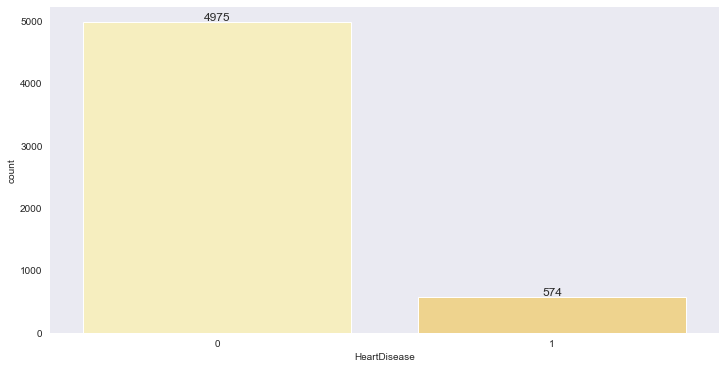



Percentage of each category:
0    89.655794
1    10.344206
Name: HeartDisease, dtype: float64


In [62]:
plt.rcParams['figure.figsize'] = (12, 6)
def plot_data_count(health, col, return_pct_share=True, hue=None, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=health, x=col, hue=hue)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    
    plt.show()
    
    if return_pct_share:
        print("\n")
        print("Percentage of each category:")
        print(health[col].value_counts(normalize=True)*100)
        
    # Showing the number of sessions that ended in purchases and the respective percentages
plot_data_count(health, 'HeartDisease')

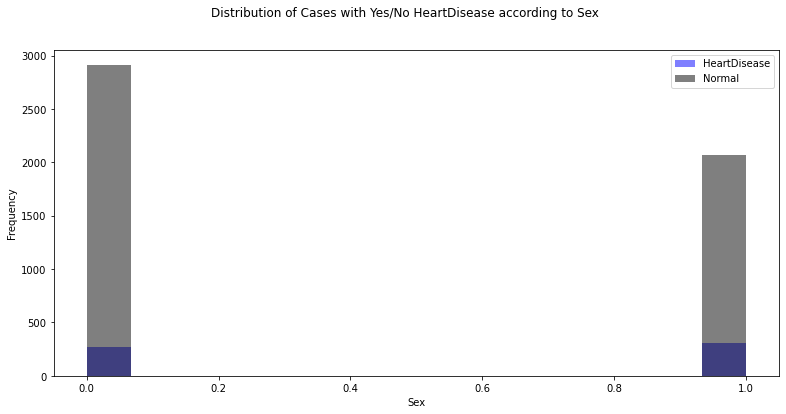

In [28]:
#Exploratory Analysis


fig, ax = plt.subplots(figsize = (13,6))

ax.hist(health[health["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="blue", label="HeartDisease")
ax.hist(health[health["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="black", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No HeartDisease according to Sex")

ax.legend()

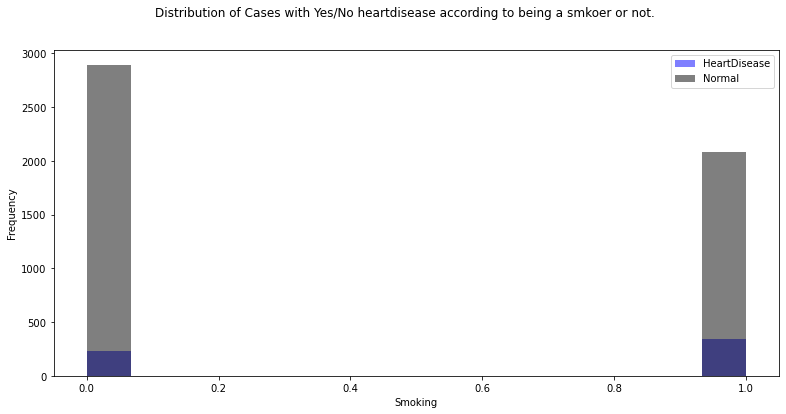

In [29]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(health[health["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.5, color="blue", label="HeartDisease")
ax.hist(health[health["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="black", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smkoer or not.")

ax.legend();

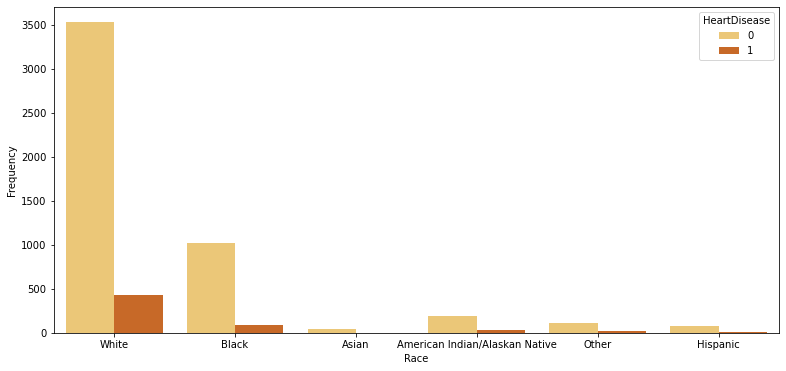

In [31]:
plt.figure(figsize = (13,6))
sns.countplot( x= health['Race'], hue = 'HeartDisease', data = health, palette = 'YlOrBr')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

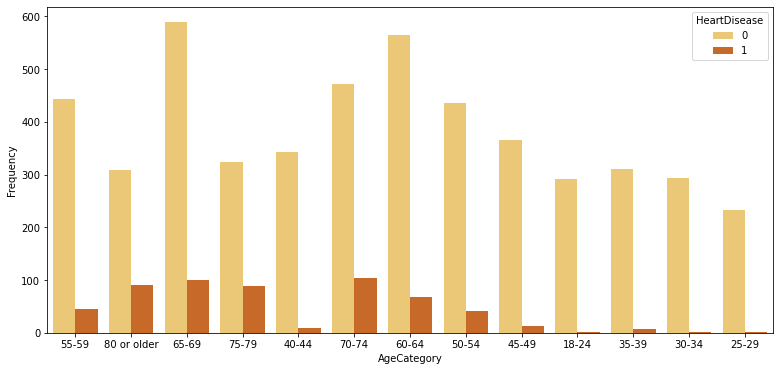

In [32]:
plt.figure(figsize = (13,6))
sns.countplot(x = health['AgeCategory'], hue = 'HeartDisease', data = health, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

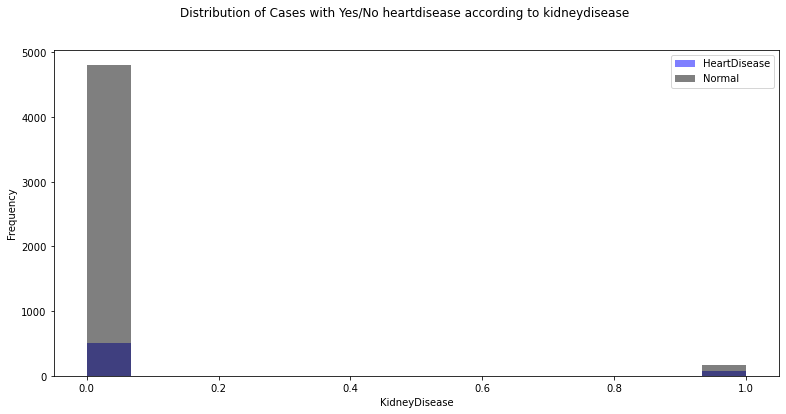

In [33]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(health[health["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.5, color="blue", label="HeartDisease")
ax.hist(health[health["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="black", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydisease")

ax.legend();

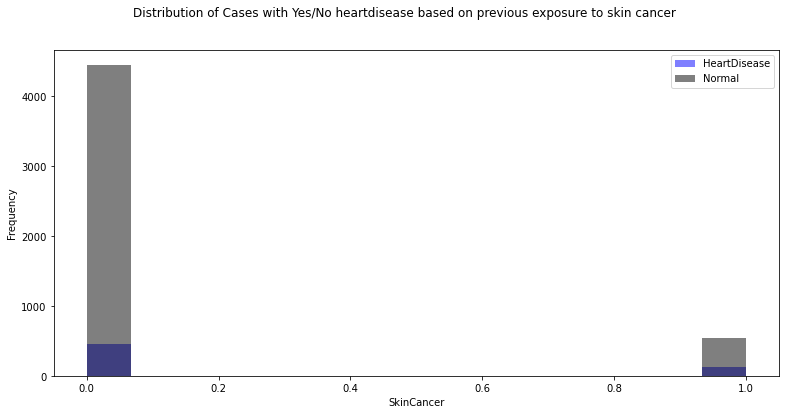

In [34]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(health[health["HeartDisease"]==1]["SkinCancer"], bins=15, alpha=0.5, color="blue", label="HeartDisease")
ax.hist(health[health["HeartDisease"]==0]["SkinCancer"], bins=15, alpha=0.5, color="black", label="Normal")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease based on previous exposure to skin cancer")

ax.legend();

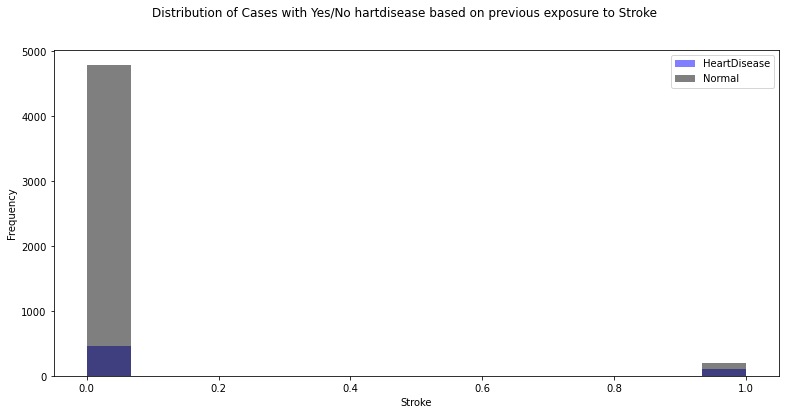

In [35]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(health[health["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="blue", label="HeartDisease")
ax.hist(health[health["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="black", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke")

ax.legend();

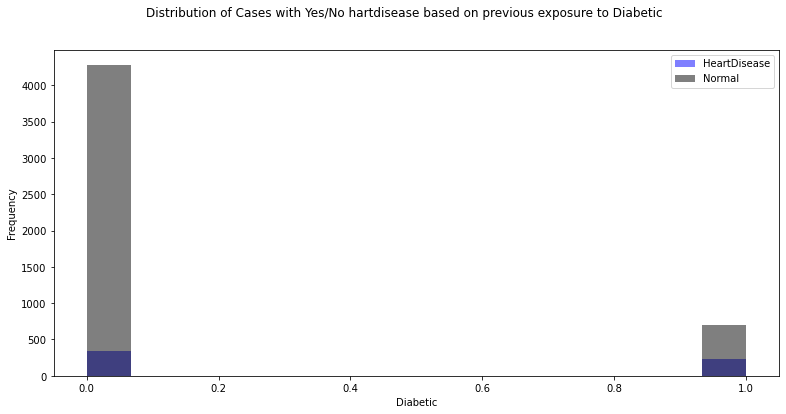

In [36]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(health[health["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.5, color="blue", label="HeartDisease")
ax.hist(health[health["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="black", label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic")

ax.legend();

<AxesSubplot:>

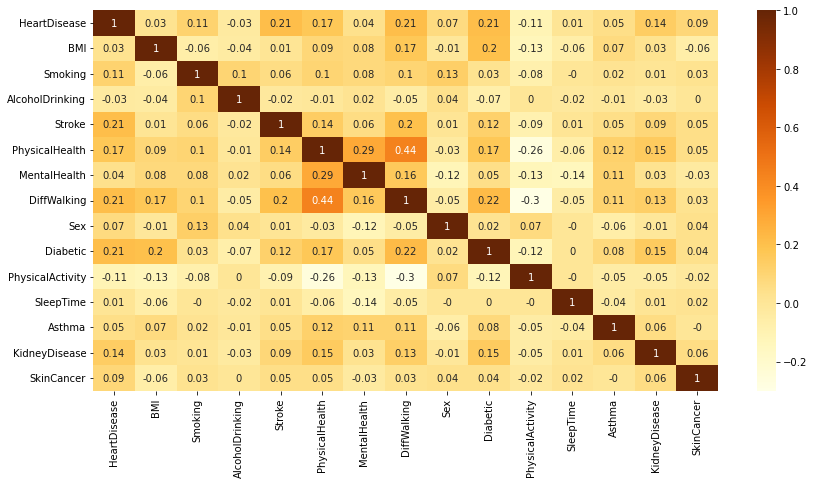

In [37]:
correlation = health.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

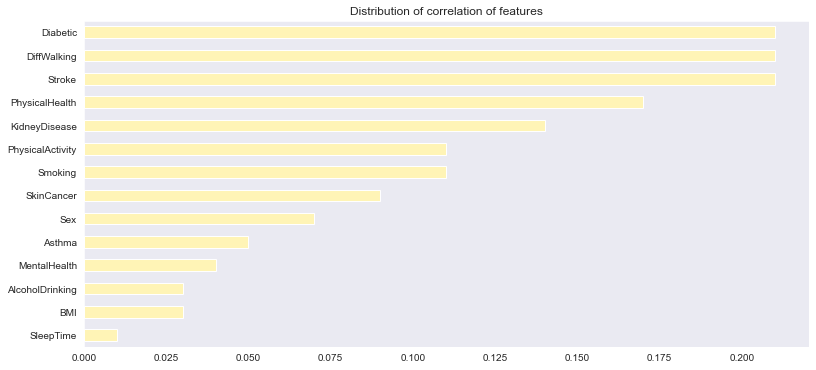

In [38]:
sns.set_style('dark')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

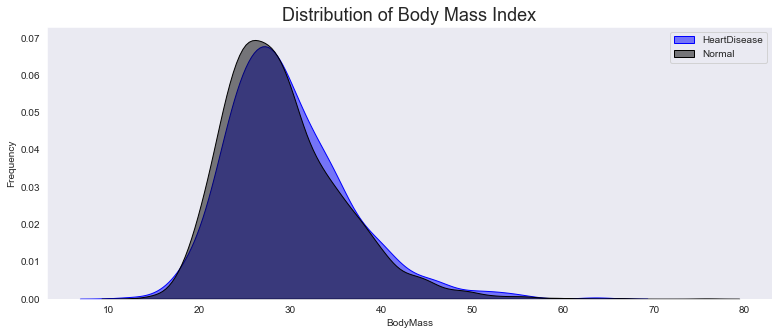

In [39]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(health[health["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="blue", label="HeartDisease", ax = ax)
sns.kdeplot(health[health["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="black", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

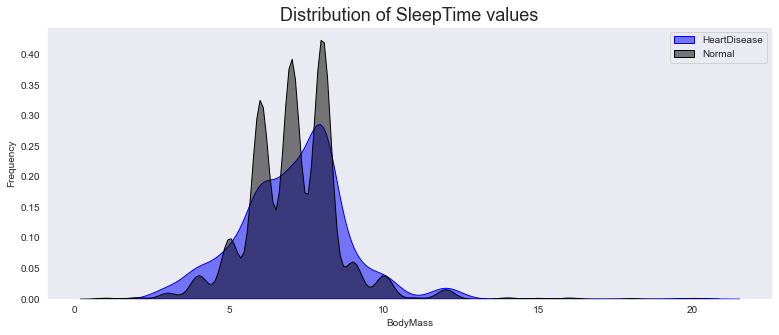

In [40]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(health[health["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="blue", label="HeartDisease", ax = ax)
sns.kdeplot(health[health["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="black", label="Normal", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

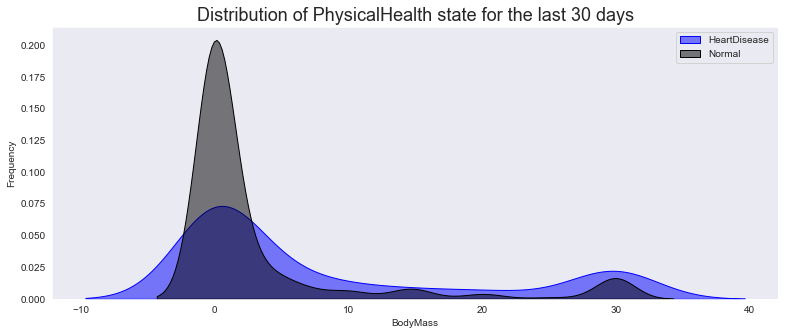

In [41]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(health[health["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="blue", label="HeartDisease", ax = ax)
sns.kdeplot(health[health["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="black", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

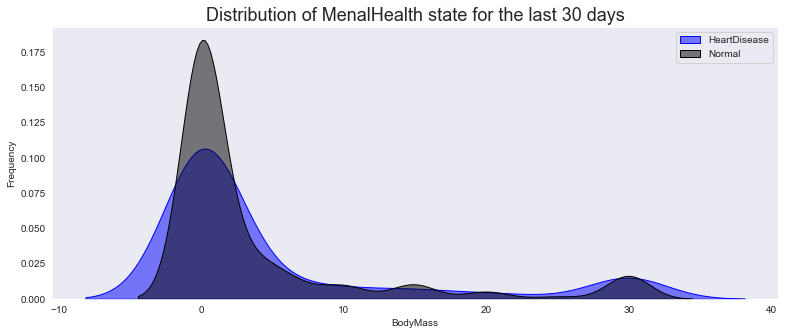

In [42]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(health[health["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="blue", label="HeartDisease", ax = ax)
sns.kdeplot(health[health["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="black", label="Normal", ax = ax)
plt.title('Distribution of MenalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

In [43]:
# Data Processing
# Standardization

from sklearn.preprocessing import StandardScaler 
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
Scaler = StandardScaler()
health[num_cols] = Scaler.fit_transform(health[num_cols])


In [44]:
#Encoding
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

# Encoding categorical features 
categ = health[['AgeCategory', 'Race', 'GenHealth']]
encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

#Likning the encoed_cateh with the df
health = pd.concat([health, encoded_categ], axis = 1)

# Dropping the categorical features
health = health.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis = 1)

In [45]:
features= ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']
label= ['HeartDisease']
X=health[features]
y= health[label]

In [46]:
# Split Dataset for Training and Testing

#Select Features
features = health.drop(columns =['HeartDisease'], axis = 1)

#Select Target 
target = health['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)




Shape of training feature: (4439, 38)
Shape of testing feature: (1110, 38)
Shape of training label: (4439,)
Shape of testing label: (1110,)


In [47]:
# Modelling

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(14,5))
    cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    sns.heatmap(cm, annot=True,fmt='d',cmap="Blues");

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

Accuracy: 0.8801801801801802
Precision: 0.41935483870967744
Recall: 0.1015625
F1 Score: 0.16352201257861634
Cohens Kappa Score: 0.12413825836230519
Area Under Curve: 0.6938963849287169
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0          964           18
Actual:1          115           13


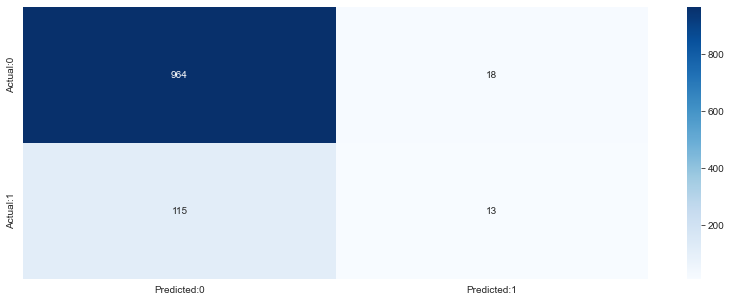

In [48]:
# Building Model

# Building a model using KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8351351351351352
Precision: 0.2932330827067669
Recall: 0.3046875
F1 Score: 0.2988505747126437
Cohens Kappa Score: 0.20547441543913447
Area Under Curve: 0.6044822428716905
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0          888           94
Actual:1           89           39


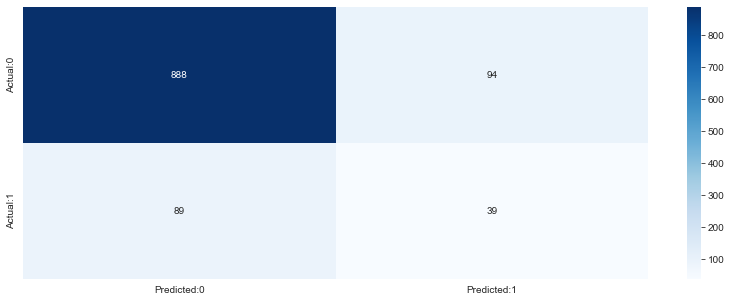

In [49]:
from sklearn import tree

# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

In [50]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.8729729729729729
Precision: 0.24
Recall: 0.046875
F1 Score: 0.0784313725490196
Cohens Kappa Score: 0.042342287217769115
Area Under Curve: 0.7539738734725052
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0          963           19
Actual:1          122            6


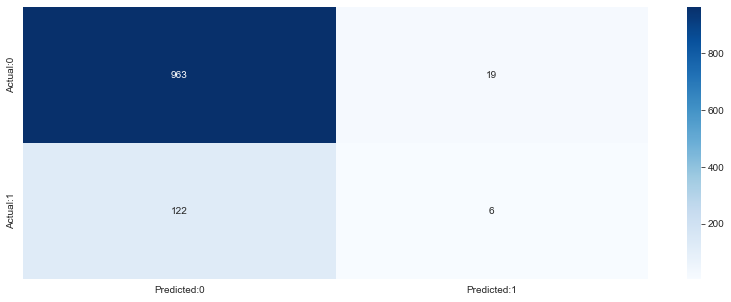

In [51]:
# Building Random Forest Classifier
rf = RandomForestClassifier(random_state=0)

rf.fit(X_train, y_train)


# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.881981981981982
Precision: 0.42857142857142855
Recall: 0.0703125
F1 Score: 0.12080536912751677
Cohens Kappa Score: 0.09126701413626304
Area Under Curve: 0.7979410641547862
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0          970           12
Actual:1          119            9


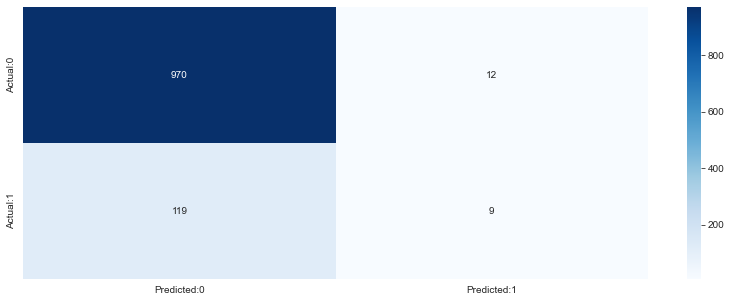

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gradientboostclf = GradientBoostingClassifier(max_depth=2, random_state=0)
gradientboostclf.fit(X_train,y_train)


# Evaluate Model
gradientboostclf_eval = evaluate_model(gradientboostclf, X_test, y_test)

# Print result
print('Accuracy:',gradientboostclf_eval['acc'])
print('Precision:', gradientboostclf_eval['prec'])
print('Recall:',gradientboostclf_eval['rec'])
print('F1 Score:',gradientboostclf_eval['f1'])
print('Cohens Kappa Score:',gradientboostclf_eval['kappa'])
print('Area Under Curve:', gradientboostclf_eval['auc'])
print('Confusion Matrix:\n', gradientboostclf_eval['cm'])

In [53]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.8774774774774775
Precision: 0.35714285714285715
Recall: 0.078125
F1 Score: 0.12820512820512822
Cohens Kappa Score: 0.09055858113644033
Area Under Curve: 0.8100337321792261
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0          964           18
Actual:1          118           10


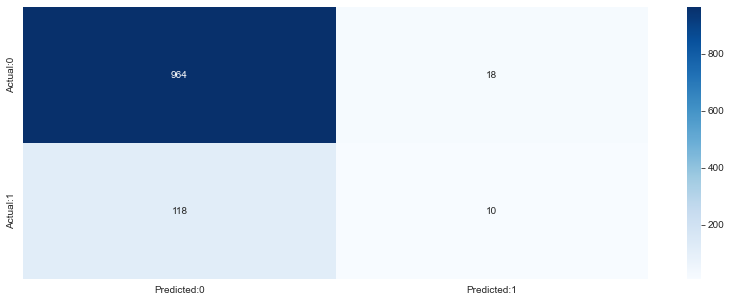

In [54]:
lgr = LogisticRegression(random_state=2, max_iter=500, )
lgr.fit(X_train,y_train)


# Evaluate Model
lgr_eval = evaluate_model(lgr, X_test, y_test)

# Print result
print('Accuracy:',lgr_eval['acc'])
print('Precision:', lgr_eval['prec'])
print('Recall:',lgr_eval['rec'])
print('F1 Score:',lgr_eval['f1'])
print('Cohens Kappa Score:',lgr_eval['kappa'])
print('Area Under Curve:', lgr_eval['auc'])
print('Confusion Matrix:\n', lgr_eval['cm'])

In [55]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import Adam, SGD

In [56]:
import tensorflow as tf

Epoch 1/30
139/139 [==============================] - 6s 5ms/step - loss: 0.3985 - accuracy: 0.8939
Epoch 2/30
139/139 [==============================] - 0s 3ms/step - loss: 0.3072 - accuracy: 0.8993
Epoch 3/30
139/139 [==============================] - 0s 3ms/step - loss: 0.2853 - accuracy: 0.9000
Epoch 4/30
139/139 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.9000
Epoch 5/30
139/139 [==============================] - 0s 3ms/step - loss: 0.2682 - accuracy: 0.9013
Epoch 6/30
139/139 [==============================] - 0s 3ms/step - loss: 0.2634 - accuracy: 0.9027
Epoch 7/30
139/139 [==============================] - 0s 3ms/step - loss: 0.2600 - accuracy: 0.9029
Epoch 8/30
139/139 [==============================] - 0s 3ms/step - loss: 0.2572 - accuracy: 0.9040
Epoch 9/30
139/139 [==============================] - 0s 3ms/step - loss: 0.2554 - accuracy: 0.9049
Epoch 10/30
139/139 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.9052

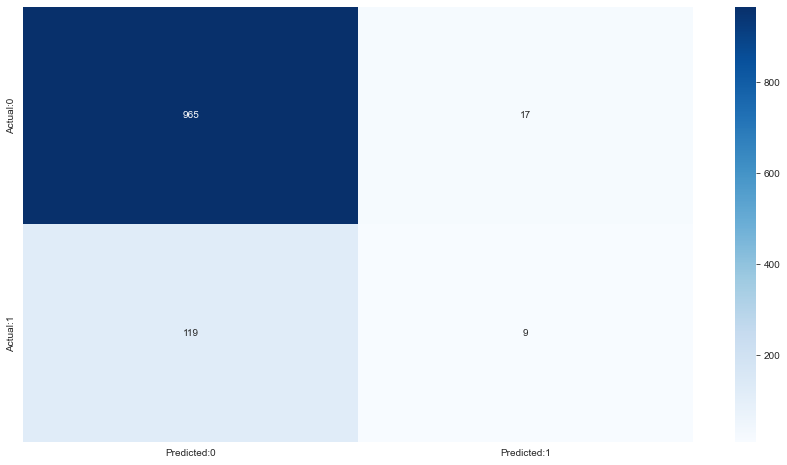

In [57]:
Ann = tf.keras.models.Sequential()



# adding 6 units to the first layer with activation function of relu
Ann.add(tf.keras.layers.Dense(units=6, activation='relu'))



# adding 1 unit to the second layer with activation function of sigmoid
Ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



# next is compiling with Adam optimizer and binary crossentropy loss
Ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



# training the ANN with 60 Epochs
Ann.fit(X_train, y_train, batch_size = 32, epochs = 30)



#predicting...............................
Ann_y_pred = Ann.predict(X_test)
Ann_y_pred = (Ann_y_pred > 0.5)




# The Accuracy score of the ANN model



Ann_acc = accuracy_score(y_test, Ann_y_pred)
print('Testing Accuracy score:', Ann_acc*100)






# The Precision score
Ann_pre = precision_score(y_test, Ann_y_pred)
print('Precision score:', Ann_pre*100)



# The Recall score
Ann_rec = recall_score(y_test, Ann_y_pred)
print('Recall score:', Ann_rec*100)



# The F1 score
Ann_f1 = precision_score(y_test, Ann_y_pred)
print('F1 score:', Ann_f1*100)



# Next, the confusion matrix for the KNN model



conf_mat_Ann = confusion_matrix(y_test, Ann_y_pred)



plt.figure(figsize=(15,8))



con_matrix6 = pd.DataFrame(data=conf_mat_Ann,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(con_matrix6, annot=True,fmt='d',cmap="Blues");



Ann_y_pred = np.round(Ann_y_pred).astype(int)
# The AUC (Area Under the Curve) of the Model

# Modelling

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

  

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

kappa_ann = metrics.cohen_kappa_score(y_test, Ann_y_pred)
print('KAPPA score:', kappa_ann*100)


Ann_auc = metrics.roc_auc_score(y_test, Ann_y_pred)
print('AUC score:', Ann_auc*100)


 

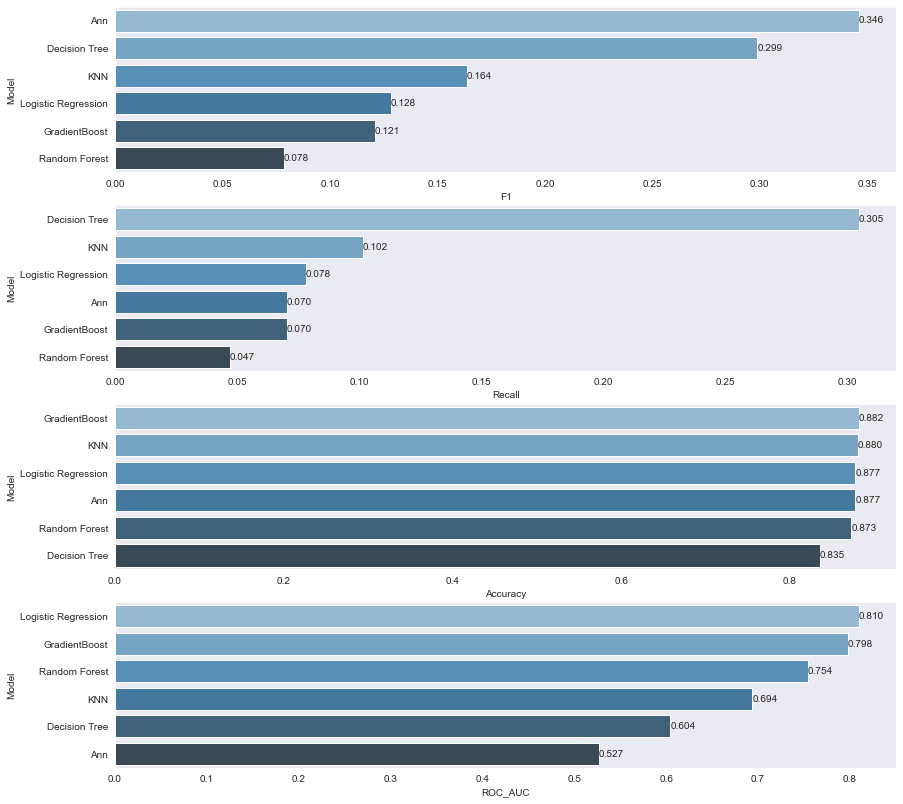

In [58]:
compare = pd.DataFrame({"Model": ["Logistic Regression",  "KNN", "Decision Tree", "Random Forest", "GradientBoost", "Ann"],
                        "F1": [lgr_eval['f1'], knn_eval['f1'], clf_eval['f1'], rf_eval['f1'], gradientboostclf_eval['f1'], Ann_f1],
                        "Recall": [lgr_eval['rec'], knn_eval['rec'], clf_eval['rec'], rf_eval['rec'], gradientboostclf_eval['rec'], Ann_rec],
                        "Accuracy": [ lgr_eval['acc'],  knn_eval['acc'],  clf_eval['acc'],  rf_eval['acc'],  gradientboostclf_eval['acc'], Ann_acc],
                        "ROC_AUC": [lgr_eval['auc'], knn_eval['auc'], clf_eval['auc'], rf_eval['auc'], gradientboostclf_eval['auc'], Ann_auc]})
                    
         
                        
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)



plt.show()